In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [4]:
import os

def count_subfolders(directory):
    subfolders = [f.path for f in os.scandir(directory) if f.is_dir()]
    return len(subfolders)

# Example usage
directory_path = '/work3/s220243/Thesis/all_validation_images/validation'
num_subfolders = count_subfolders(directory_path)
print(f"Number of subfolders in '{directory_path}': {num_subfolders}")

Number of subfolders in '/work3/s220243/Thesis/all_validation_images/validation': 110


In [2]:
base_path = '/zhome/ac/d/174101/thesis'

In [3]:
df = pd.read_excel(f"{base_path}/data/imageAnalysis_information.xlsx")
df  = pd.DataFrame(df.values[1:], columns=df.iloc[0])
df.head()

,event_id,IBT number,genus,species,start date,end date,date of picture,image no,video,temperature,picture interval,comments,Reshape Job ID,Reshape plate position,Ofba reference list,Comments
0,ima001,IBT 12085,Penicillium,smithii,2023-02-20,2023-02-27,day 4,192,NaN,25,30 min,NaN,NaN,NaN,NaN,NaN
1,ima001,IBT 13516,Penicilluim,bilaiae,2023-02-20,2023-02-27,day 4,192,NaN,25,30 min,NaN,NaN,NaN,NaN,NaN
2,ima001,IBT 21948,Penicilluim,malodoratum,2023-02-20,2023-02-27,day 4,192,NaN,25,30 min,NaN,NaN,NaN,NaN,NaN
3,ima001,IBT 21902,Aspergillus,astellatus,2023-02-20,2023-02-27,day 4,192,NaN,25,30 min,NaN,NaN,NaN,NaN,NaN
4,ima001,NID174,Aspergillus,nidulans,2023-02-20,2023-02-27,day 4,192,NaN,25,30 min,NaN,NaN,NaN,NaN,NaN


In [4]:
# Strip the blank spaces from names
df['species'] = df['species'].str.strip()
df['genus'] = df['genus'].str.strip()

In [5]:
# Count the occurrences
species_count = df['species'].value_counts()
genus_count = df['genus'].value_counts()
date_of_count = df['date of picture'].value_counts()
image_number_count = df['image no'].value_counts()


In [6]:
IBTs_df = pd.DataFrame({"IBT_number": df['IBT number'],
                          "Target" : df["genus"]+"-"+df["species"]})

IBTs_df.dropna()

# Group by the 'Target' column and aggregate 'IBT_number' into a list
grouped_df = IBTs_df.groupby('Target').agg({
    'IBT_number': lambda x: list(x)
}).reset_index()

# Rename the aggregated column if needed
grouped_df = grouped_df.rename(columns={'IBT_number': 'IBT_numbers'})

grouped_df['Different IBTs'] = grouped_df['IBT_numbers'].apply(len)

filtered_df = grouped_df[grouped_df['Different IBTs'] > 1]

filtered_df = filtered_df.sort_values(by='Different IBTs', ascending=False)
'''
plt.figure(figsize=(12, 6))
plt.bar(filtered_df['Target'], filtered_df['Different IBTs'], color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of IBTs')
plt.title('Number of IBTs per Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

filtered_df
'''

"\nplt.figure(figsize=(12, 6))\nplt.bar(filtered_df['Target'], filtered_df['Different IBTs'], color='skyblue')\nplt.xlabel('Class')\nplt.ylabel('Number of IBTs')\nplt.title('Number of IBTs per Class')\nplt.xticks(rotation=90)\nplt.tight_layout()\nplt.show()\n\nfiltered_df\n"

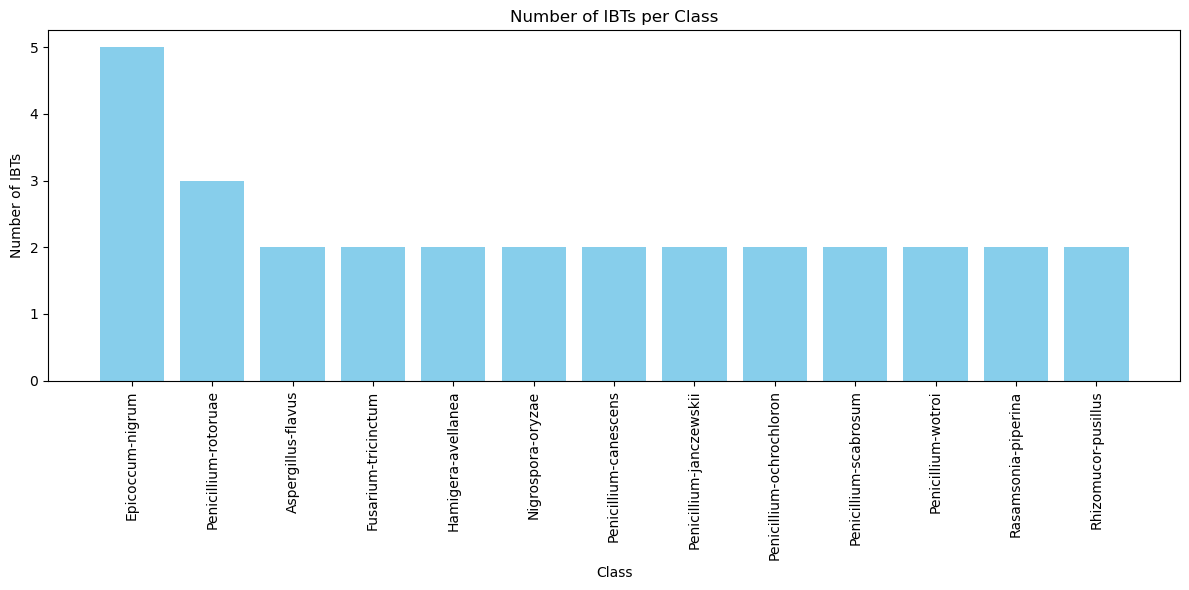

,Target,IBT_numbers,Different IBTs
15,Epicoccum-nigrum,"[IBT 40303, IBT 23138, IBT 41379, IBT 42473, I...",5
44,Penicillium-rotoruae,"[IBT 35839, IBT 35695, IBT 36523]",3
6,Aspergillus-flavus,"[IBT 36710, IBT 36709]",2
20,Fusarium-tricinctum,"[IBT 42760, IBT 41919]",2
21,Hamigera-avellanea,"[IBT 26575, IBT 34882]",2
27,Nigrospora-oryzae,"[IBT 42791, IBT 42908]",2
31,Penicillium-canescens,"[IBT 36715, IBT 36716]",2
38,Penicillium-janczewskii,"[IBT 36713, IBT 36714]",2
42,Penicillium-ochrochloron,"[IBT 26878, IBT 35099]",2
46,Penicillium-scabrosum,"[IBT 36712, IBT 36711]",2


In [7]:
from pathlib import Path
import re

ibt_numbers=[]
img_paths=[]

img_path = '/work3/s220243/Thesis'

# Get a list of all the images paths
img = Path(f"{img_path}/images")
paths = list(img.glob('**/*.jpeg'))

# Create list of all IBTs and paths to images for the given IBT
for path in paths:
  match = re.search(r'IBT \d+',str(path))
  if match:
    ibt_numbers.append(match.group())
    img_paths.append(str(path))
  else:
    ibt_numbers.append("ACU1")
    img_paths.append(str(path))

    # Create DF from a lists
paths_df = pd.DataFrame({"IBT_number": ibt_numbers,
                     "path": img_paths})

# Merge target_df and paths_df
paths_df = paths_df.groupby('IBT_number')['path'].apply(list).reset_index()
merged_df = pd.merge(IBTs_df, paths_df, on='IBT_number', how='inner')
#merged_df.drop(columns=['path'])

# Group by the 'Target' column and aggregate 'IBT_number' into a list
grouped_df = merged_df.groupby('Target').agg({
    'IBT_number': lambda x: list(x),
}).reset_index()

# Rename the aggregated column if needed
grouped_df = grouped_df.rename(columns={'IBT_number': 'IBT_numbers'})

grouped_df['Different IBTs'] = grouped_df['IBT_numbers'].apply(len)

filtered_df = grouped_df[grouped_df['Different IBTs'] > 0]

filtered_df = filtered_df.sort_values(by='Different IBTs', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(filtered_df['Target'], filtered_df['Different IBTs'], color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of IBTs')
plt.title('Number of IBTs per Class')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

filtered_df

In [28]:
unique_targets = merged_df['Target'].unique()
unique_targets_df = pd.DataFrame(unique_targets, columns=['Target'])
unique_targets_df[['genus', 'species']] = unique_targets_df['Target'].str.split('-', n=1, expand=True)

print(unique_targets_df)

                     Target        genus       species
0       Penicillium-smithii  Penicillium       smithii
1       Penicilluim-bilaiae  Penicilluim       bilaiae
2   Penicilluim-malodoratum  Penicilluim   malodoratum
3    Aspergillus-astellatus  Aspergillus    astellatus
4     Aspergillus-aculentus  Aspergillus     aculentus
..                      ...          ...           ...
68   Stemphylium-vesicarium  Stemphylium    vesicarium
69  Arthrinium-phaeospermum   Arthrinium  phaeospermum
70        Sordaria-fimicola     Sordaria      fimicola
71     Ulocladium-chartarum   Ulocladium     chartarum
72    Asteromyces-cruciatus  Asteromyces     cruciatus

[73 rows x 3 columns]


In [41]:
species_df = pd.DataFrame(unique_targets_df['species'].unique(), columns=['species'])
genus_df = pd.DataFrame(unique_targets_df['genus'].unique(), columns=['genus'])

In [42]:
species_count = species_df['species'].value_counts()
genus_count = genus_df['genus'].value_counts()

In [59]:
unique_targets_df['Target'] = unique_targets_df['Target'].replace('Penicilluim', 'Penicillium', regex=True)
unique_targets_df['genus'] = unique_targets_df['genus'].replace('Penicilluim', 'Penicillium', regex=True)

In [60]:
genus_species_count = unique_targets_df.groupby('genus')['species'].agg(['count']).reset_index()

/tmp/ipykernel_23130/3488821035.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20c', 27).colors  # Use a colormap with 28 colors


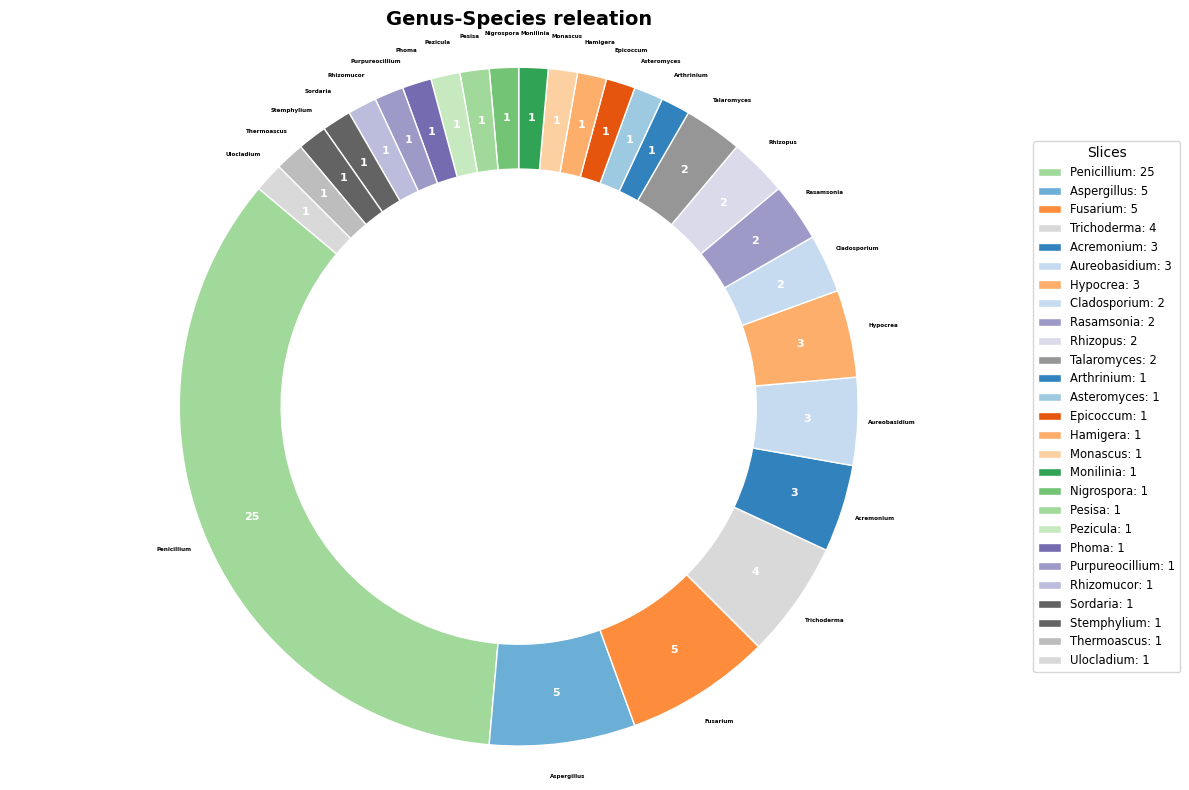

In [80]:
import matplotlib.pyplot as plt
import numpy as np

sizes = np.array(genus_species_count['count'])
labels = list(genus_species_count['genus'])
colors = plt.cm.get_cmap('tab20c', 27).colors  # Use a colormap with 28 colors

# Define a function to format the numbers
def absolute_value(val):
    a = np.round(val / 100. * sum(sizes), 0)
    return int(a)

# Sort labels, sizes, and colors based on sizes descending
sorted_data = sorted(zip(sizes, labels, colors), key=lambda x: x[0], reverse=True)
sorted_sizes = [data[0] for data in sorted_data]
sorted_labels = [data[1] for data in sorted_data]
sorted_colors = [data[2] for data in sorted_data]

# Create custom legend labels that include sizes
legend_labels = [f'{label}: {size}' for label, size in zip(sorted_labels, sorted_sizes)]

# Create the pie chart
fig, ax = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = ax.pie(
    sorted_sizes,
    labels=sorted_labels,
    colors=sorted_colors,  # Use sorted colors
    autopct=lambda pct: absolute_value(pct),
    startangle=140,
    wedgeprops=dict(width=0.3, edgecolor='w'),
    pctdistance=0.85,
    labeldistance=1.1  # Increase this value to increase the space between the labels and the pie
)

# Improve the text visibility
for text in texts:
    text.set_fontsize(4)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Adjust label positions manually if necessary
for text in texts:
    text.set_horizontalalignment('center')

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add a legend
ax.legend(wedges, legend_labels, title="Slices", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize='small')

# Set the title
plt.title('Genus-Species releation', fontsize=14, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()


In [84]:
# Filter out any 'Total' rows if present
genus_species_count_plot = genus_species_count[genus_species_count['genus'] != 'Total']

# Create the treemap plot
fig = go.Figure(go.Treemap(
    labels=genus_species_count_plot['genus'],
    parents=[''] * len(genus_species_count_plot['genus']),
    values=genus_species_count_plot['count'],
    textinfo="label+value"
))

# Update layout for better appearance
fig.update_layout(
    title="Genus-Species relation",
    treemapcolorway=["SkyBlue", "LightGray"],  # Adjust colors as needed
    width=800,  # Adjust width as per your preference
    height=600,  # Adjust height as per your preference
    margin=dict(l=0, r=0, t=40, b=0),  # Adjust margins for better layout
)

fig.show()